# LSTM(Long Short-Term Memory) 구조

<img src = "./image/rnn_lstm.jpg" height = 500 width = 500>

- 단기 기억을 오래 기억하기 위해 고안되었음

<img src = "./image/lstm.png" width = 600 height = 600>

- 은닉 상태를 만드는 방법
    - output gate layer(출력 게이트)
        1. 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후에 활성화 함수를 통과시켜 다음 은닉 상태를 만듦
            - 이 때 기본 순환층과는 달리 시그모이드 활성화 함수를 사용
        2. tanh활성화 함수를 통과한 값과 곱해져서 은닉 상태를 만듦
        
- LSTM은 순환 되는 상태가 2개
    - 은닉 상태(hidden state)
    - 셀 상태(cell state)
        - 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 값
        
- 셀 상태를 계산하는 과정
    - forget gate layer(삭제 게이트)
        - 정보를 제거하는 역할
        1. 입력과 은닉 상태를 또 다른 가중치에 곱한 다음 시그모이드 함수를 통과
        2. 이전 타임스텝의 셀 상태와 곱하여 새로운 셀 상태를 만듦
            - 이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는 데 기여
        
    - input gate layer(입력 게이트)
        - 새로운 정보를 셀 상태에 추가
        1. 입력값과 은닉 상태를 각기 다른 가중치에 곱함
        2. 하나는 시그모이드 함수, 하나는 tanh 함수를 통과
        3. 두 결과를 곱함
        4. 이전 셀 상태와 더함

## 데이터 준비

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 500)

In [3]:
# 훈련 세트와 검증 세트로 나누기
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                  stratify = y_train,
                                                  random_state = 5)

In [4]:
# 패딩
train_seq = pad_sequences(x_train, maxlen = 100)
val_seq = pad_sequences(x_val, maxlen = 100)

In [5]:
# LSTM 모델 생성
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16, input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- LSTM 셀 파라미터 개수
    - ((8 * 8) + (16 * 8) + 8) * 4 = 800

In [7]:
((8 * 8) + (16 * 8) + 8) * 4

800

In [9]:
rmsprop =  keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop , loss = "binary_crossentropy", metrics = ["accuracy"])

In [13]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-ltsm-model.h5",
                                               save_best_only= True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience = 3, restore_best_weights =True)

In [14]:
history = model.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, y_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 44ms/step - loss: 0.6926 - accuracy: 0.5521 - val_loss: 0.6918 - val_accuracy: 0.5996
Epoch 2/100
  3/313 [..............................] - ETA: 10s - loss: 0.6917 - accuracy: 0.6406

C:\Users\양창우\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 13s 43ms/step - loss: 0.6906 - accuracy: 0.5807 - val_loss: 0.6887 - val_accuracy: 0.6410
Epoch 3/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6836 - accuracy: 0.6398 - val_loss: 0.6746 - val_accuracy: 0.6488
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6415 - accuracy: 0.6848 - val_loss: 0.6123 - val_accuracy: 0.7034
Epoch 5/100
313/313 [==============================] - 13s 43ms/step - loss: 0.5988 - accuracy: 0.7119 - val_loss: 0.5899 - val_accuracy: 0.7258
Epoch 6/100
313/313 [==============================] - 13s 43ms/step - loss: 0.5765 - accuracy: 0.7348 - val_loss: 0.5720 - val_accuracy: 0.7384
Epoch 7/100
313/313 [==============================] - 13s 43ms/step - loss: 0.5586 - accuracy: 0.7485 - val_loss: 0.5553 - val_accuracy: 0.7462
Epoch 8/100
313/313 [==============================] - 14s 45ms/step - loss: 0.5429 - accuracy: 0.7598 - val_loss: 0.5426 - val_accuracy: 0.75

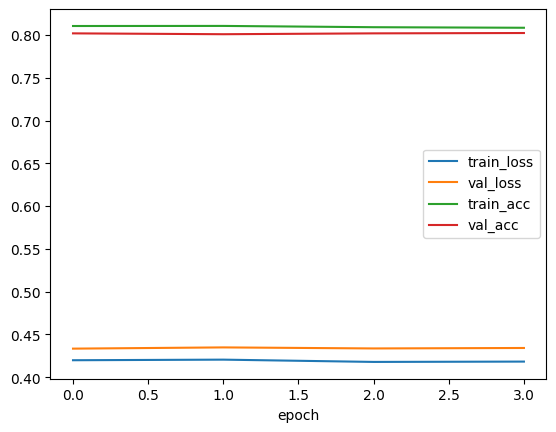

In [60]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# 순환층에 드롭아웃 적용

- 순환층은 자체적으로 드롭아웃 기능을 제공
    - SimpleRNN과  LSTM 클래스 모두 dropout 매개변수 recurrent_dropout 매개변수를 가지고 있음
        - dropout : 셀의 입력에 드롭아웃을 적용
        - recurrent_dropout : 순환되는 은닉 상태에 드롭아웃을 적용
            - 버전에 따라 recurrent_dropout이 GPU를 사용하지 못하는 경우가 많음

In [36]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = "sigmoid"))

In [37]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = "binary_crossentropy",
              metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-dropout-model.h5",
                                                save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3,
                                                  restore_best_weights = True)

In [59]:
history = model3.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, y_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 26ms/step - loss: 0.4198 - accuracy: 0.8106 - val_loss: 0.4333 - val_accuracy: 0.8020
Epoch 2/100
313/313 [==============================] - 8s 24ms/step - loss: 0.4205 - accuracy: 0.8107 - val_loss: 0.4348 - val_accuracy: 0.8010
Epoch 3/100
313/313 [==============================] - 8s 24ms/step - loss: 0.4178 - accuracy: 0.8092 - val_loss: 0.4335 - val_accuracy: 0.8020
Epoch 4/100
313/313 [==============================] - 8s 24ms/step - loss: 0.4182 - accuracy: 0.8086 - val_loss: 0.4341 - val_accuracy: 0.8024


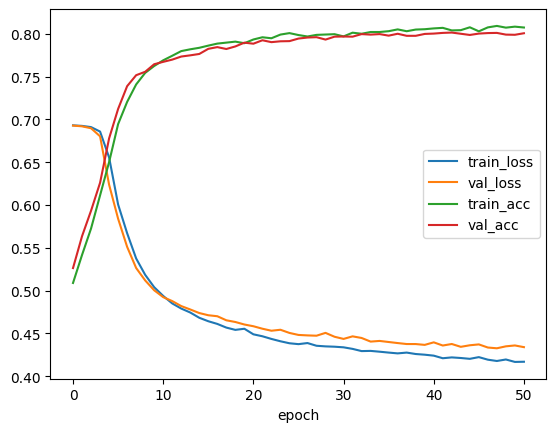

In [58]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# 2개의 층을 연결

- 순환층을 연결할 때 주의점
    - 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달
        - 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요함
            - return_sequences 매개변수를 True로 지정
            

In [39]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
model4.add(keras.layers.LSTM(8, dropout = 0.3))
model4.add(keras.layers.Dense(1, activation = "sigmoid"))

In [47]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 첫 번째 LSTM
    - 모든 타임스텝(100개)의 은닉 상태를 출력하기 때문에 출력의 크기가 (None, 100, 8)
    - 파라미터 수
        - ((16*8) +(8 * 8)+ 8)*4
    
    
- 두번째 LSTM
    - 

In [43]:
((16*8) +(8 * 8)+ 8)*4

800

In [48]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accruacy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-2rnn-model.h5",
                                               save_best_only = True)

In [51]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = "binary_crossentropy",
              metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-2rnn-model.h5",
                                                save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3,
                                                  restore_best_weights = True)

In [52]:
history = model4.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, y_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 50ms/step - loss: 0.6931 - accuracy: 0.5090 - val_loss: 0.6928 - val_accuracy: 0.5264
Epoch 2/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6924 - accuracy: 0.5417 - val_loss: 0.6919 - val_accuracy: 0.5636
Epoch 3/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6910 - accuracy: 0.5726 - val_loss: 0.6897 - val_accuracy: 0.5934
Epoch 4/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6858 - accuracy: 0.6113 - val_loss: 0.6802 - val_accuracy: 0.6260
Epoch 5/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6556 - accuracy: 0.6501 - val_loss: 0.6238 - val_accuracy: 0.6778
Epoch 6/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6007 - accuracy: 0.6945 - val_loss: 0.5840 - val_accuracy: 0.7122
Epoch 7/100
313/313 [==============================] - 14s 46ms/step - loss: 0.5671 - accuracy: 0.7204 - val_loss: 0.5512 - val_ac

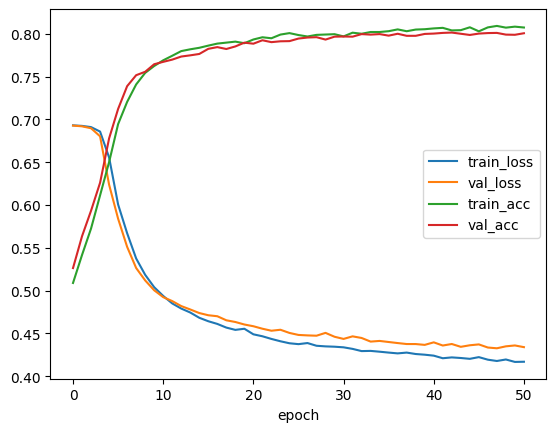

In [53]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# GRU(Grated Recurrent Unit) 구조

<img src = "./image/rnn_lstm_gru.png">

- LSTM을 간소화한 버전
- LSTM처럼 셀 상태를 계산하지 않고 은닉 상태 하나만 포함
- LSTM보다 가중치가 적기 때문에 계산량이 적지만 성능은 LSTM과 유사함
- LSTM보다 가중치가 적기 때문에 계산량이 적지만 성은은 LSTM과 유사함
    - 데이터 양이 적을 때는 GRU의 성능이 더 좋고 데이터 양이 많을 때는 LSTM의 성능이 더 좋아지는 경향이 있음
    - GRU와 LSTM 중 어떤 것이 더 낫다라고 말할 수는 없음

<img src = "./image/gru.png" width=500 height=500>

- GRU 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀 3개가 들어 있음
    - 2개는 시그모이드 활성화 함수를 사용하고 하나는 tanh 활성화 함수를 사용
    
    
- reset_gate 
    - 셀의 출력이 은닉 상태에 바로 곱해져 삭제 게이트 역할을 수행
    
- update_gate
    - 어떤 정보를 얼마만큼 유지하고 어떤 정보를 추가할지 결정하는 역할

In [54]:
model5 = keras.Sequential()
model5.add(keras.layers.Embedding(500,16, input_length = 100))
model5.add(keras.layers.GRU(8))
model5.add(keras.layers.Dense(1, activation ="sigmoid"))

In [55]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- GRU 파라미터 수
    - ((16 * 8)+ (8 * 8)+8 +(유닛수= 8)) * 3

In [57]:
 ((16 * 8)+ (8 * 8)+8 + 8) * 3

624

In [64]:

rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model5.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-gru-model.h5",
                                               save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3,
                                                  restore_best_weights = True)

In [65]:
history = model5.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, y_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 27ms/step - loss: 0.6923 - accuracy: 0.5304 - val_loss: 0.6912 - val_accuracy: 0.5572
Epoch 2/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6906 - accuracy: 0.5622 - val_loss: 0.6892 - val_accuracy: 0.5842
Epoch 3/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6881 - accuracy: 0.5768 - val_loss: 0.6862 - val_accuracy: 0.5994
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6844 - accuracy: 0.5942 - val_loss: 0.6815 - val_accuracy: 0.6104
Epoch 5/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6785 - accuracy: 0.6049 - val_loss: 0.6742 - val_accuracy: 0.6230
Epoch 6/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6692 - accuracy: 0.6221 - val_loss: 0.6625 - val_accuracy: 0.6306
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6542 - accuracy: 0.6391 - val_loss: 0.6438 - val_accuracy

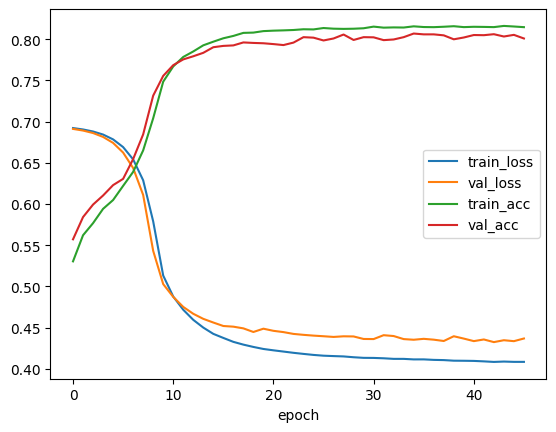

In [68]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# best model 검증

In [74]:
test_seq = pad_sequences(x_test, maxlen = 100)

In [75]:
rnn_model = keras.models.load_model("C:/dl/model/best-cnn-model.h5")

In [77]:
rnn_model.evaluate(test_seq, y_test)

ValueError: in user code:

    File "C:\Users\양창우\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\양창우\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\양창우\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\양창우\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1893, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\양창우\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\양창우\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 100)
